In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
from pathlib import Path

# 0. Filenames

In [2]:
RECOMMENDATION_REPORTS = Path("../reports/recommendation")
FIGURES = Path("../reports/figures")
DATA_INTERIM = Path("../data/interim")

In [3]:
# evaluation
rules = RECOMMENDATION_REPORTS / "rule-based/rule_based_evaluation.json"
bpart5 = RECOMMENDATION_REPORTS / "bpart5/bpart5_evaluation.json"
files = [rules,bpart5]
# recommendation cases
rec_rules = RECOMMENDATION_REPORTS / "rule-based/rule_based_rec_cases.json"
rec_bpart5 = RECOMMENDATION_REPORTS / "bpart5/bpart5_rec_cases.json"
rec_files = [rec_rules,rec_bpart5]

pkl_file = DATA_INTERIM / "bpmn_models_as_networkx_graphs.pkl"
split_file = DATA_INTERIM / "processes_split.json"
    
methods=["rules","bpart5"]

# 1. Overall results

In [4]:
def get_results(filename):
    with open(filename,"r") as ef:
        cases = json.load(ef)
        final = cases["final result"]
        cases = cases["results per case"]
    return cases, final

In [5]:
cases = dict()
final = dict()

for filename, method in zip(files, methods):
    cases[method], final[method] = get_results(filename)

In [6]:
def get_rec_cases(filename):
    with open(filename,"r") as rf:
        d = json.load(rf)
    return d["solved_recommendation_cases"]

In [7]:
rec_cases = dict()

for filename, method in zip(rec_files, methods):
    rec_cases[method] = get_rec_cases(filename)

In [8]:
font = {'size'   : 19}
plt.rc('font', **font)

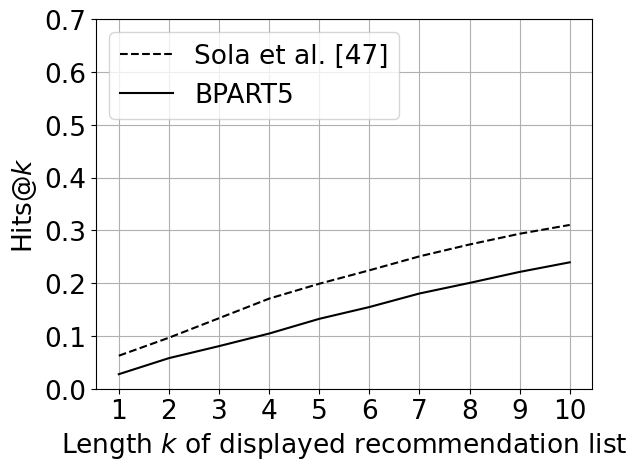

In [9]:
fig, ax = plt.subplots()
ax.plot(range(1,11),final["rules"]["hits_at"],"--",label="Sola et al. [47]", color="k")
ax.plot(range(1,11),final["bpart5"]["hits_at"],"-",label="BPART5",color="k")
ax.legend(loc = 'upper left')
plt.ylim([0,0.7])
plt.grid()
plt.xlabel("Length $k$ of displayed recommendation list")
plt.ylabel("Hits@$k$")
plt.xticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"])
#plt.savefig(FIGURES/"hits.pdf",transparent=True,bbox_inches = 'tight')
plt.show()

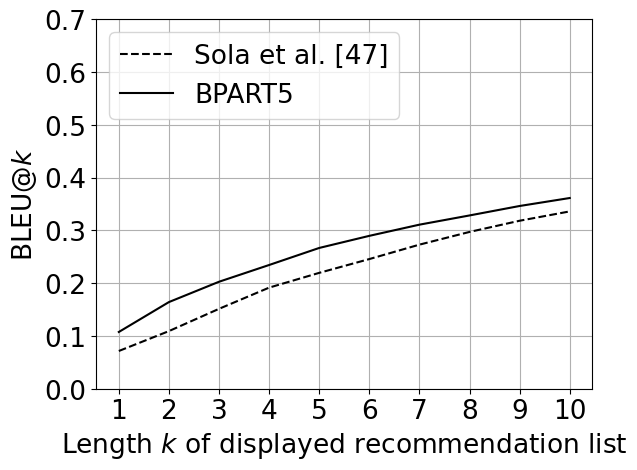

In [10]:
fig, ax = plt.subplots()
ax.plot(range(1,11),final["rules"]["bleu"],"--",label="Sola et al. [47]", color="k")
ax.plot(range(1,11),final["bpart5"]["bleu"],"-",label="BPART5",color="k")
ax.legend(loc = 'upper left')
plt.ylim([0,0.7])
plt.grid()
plt.xlabel("Length $k$ of displayed recommendation list")
plt.ylabel("BLEU@$k$")
plt.xticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"])
#plt.savefig(FIGURES/"bleu.png",transparent=True,bbox_inches = 'tight')
plt.show()

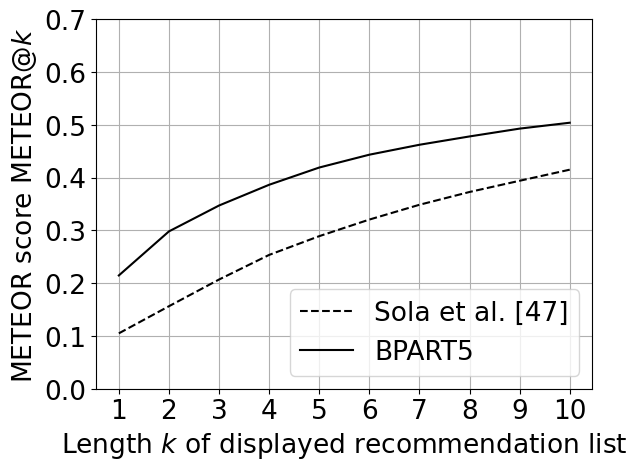

In [11]:
fig, ax = plt.subplots()
ax.plot(range(1,11),final["rules"]["meteor"],"--",label="Sola et al. [47]", color="k")
ax.plot(range(1,11),final["bpart5"]["meteor"],"-",label="BPART5",color="k")
ax.legend(loc = 'lower right')
plt.ylim([0,0.7])
plt.grid()
plt.xlabel("Length $k$ of displayed recommendation list")
plt.ylabel("METEOR score METEOR@$k$")
plt.xticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"])
#plt.savefig(FIGURES/"meteor.png",transparent=True,bbox_inches = 'tight')
plt.show()


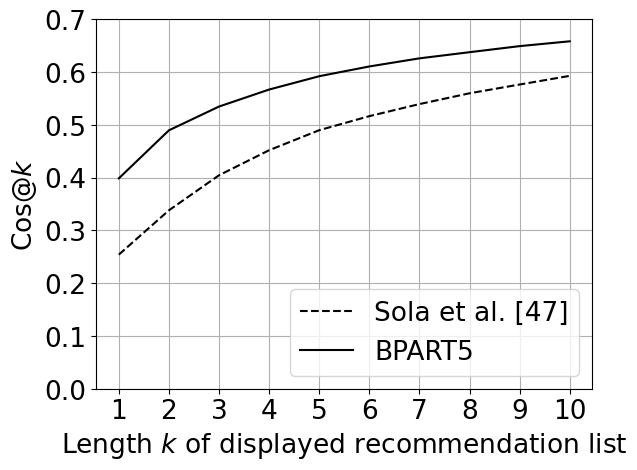

In [12]:
fig, ax = plt.subplots()
ax.plot(range(1,11),final["rules"]["cosine"],"--",label="Sola et al. [47]", color="k")
ax.plot(range(1,11),final["bpart5"]["cosine"],"-",label="BPART5",color="k")
ax.legend(loc = 'lower right')
plt.ylim([0,0.7])
plt.grid()
plt.xlabel("Length $k$ of displayed recommendation list")
plt.ylabel("Cos@$k$")
plt.xticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"])
#plt.savefig(FIGURES/"cos.png",transparent=True,bbox_inches = 'tight')
plt.show()


In [13]:
metrics = ["hits_at"]
for method in methods:
    for metric in metrics:
        print(method)
        print(metric + ": " + str(final[method][metric]))

rules
hits_at: [0.06252939711700745, 0.09658855103339513, 0.13358049968181943, 0.1706277840799048, 0.19882134853221925, 0.22424812550148024, 0.25067094596464046, 0.2731372603270343, 0.2935008162023075, 0.31018454472511964]
bpart5
hits_at: [0.027529535456381597, 0.057936529895138755, 0.08067952300583792, 0.10450156323492793, 0.13236311318927593, 0.1546910881775171, 0.18033920814542234, 0.20037074952272915, 0.221232327144952, 0.23938245303378247]


In [14]:
metrics = ["bleu"]
for method in methods:
    for metric in metrics:
        print(method)
        print(metric + ": " + str(final[method][metric]))

rules
bleu: [0.07144436295343876, 0.10914410282636064, 0.1513215976943882, 0.1914661929778985, 0.21945457287890927, 0.24556430388457928, 0.27288677467632355, 0.2969515234567941, 0.318149699332295, 0.3358275959938984]
bpart5
bleu: [0.10748033624572734, 0.16411015250936686, 0.2025975819801791, 0.23433269475043772, 0.26662272590085384, 0.28953846977026015, 0.3107191988702522, 0.32817687012360686, 0.3460869909290321, 0.3611861211947549]


In [15]:
metrics = ["meteor"]
for method in methods:
    for metric in metrics:
        print(method)
        print(metric + ": " + str(final[method][metric]))

rules
meteor: [0.104874496772493, 0.1562360021322808, 0.20680366715679496, 0.25343444487022143, 0.28894246552376207, 0.3203473981978133, 0.3483932964636442, 0.3726164099852919, 0.39385881953563173, 0.41485065471013255]
bpart5
meteor: [0.2145331379330141, 0.29794512025758274, 0.3469647261681588, 0.38626214129930303, 0.41891773180108727, 0.4432324924807867, 0.4620385370490649, 0.47781129499310065, 0.49262512432848676, 0.5037862389779648]


In [16]:
metrics = ["cosine"]
for method in methods:
    for metric in metrics:
        print(method)
        print(metric + ": " + str(final[method][metric]))

rules
cosine: [0.2539492987208309, 0.33789290401829963, 0.4042792597022185, 0.45171761541126604, 0.48962154465303653, 0.5162460279318815, 0.5390883249236635, 0.5595390156816769, 0.5761469659401365, 0.5925455790524718]
bpart5
cosine: [0.3984174120449315, 0.48940729341867484, 0.5344249454293017, 0.5666343039116074, 0.5918729686596683, 0.6103493578345008, 0.6257008045648417, 0.637367223567083, 0.6488544954851135, 0.6579863022751992]


# 2. Results on the subset of models with only unseen labels

In [17]:
def get_labels_in_split(load=True):
    if load:
        with open("labels_in_split.json","r") as lf:
            labels_in_split=json.load(lf)
    else:
        graphs = pd.read_pickle(pkl_file)
        with open(split_file, "r") as sf:
            split = json.load(sf)
        labels_in_split = {"train": set(), "validate": set(), "test": set()}
        for s in split.keys():
            print("number of models in " + s + ": " + str(len(split[s])))
            count=0
            for g in tqdm(graphs,desc="for graph in graphs..."):
                model_id = nx.get_node_attributes(g,"model_id")
                label = nx.get_node_attributes(g,"label")   
                try:
                    m_id = model_id[list(g.nodes())[0]]
                except IndexError:
                    count+=1
                    continue
                if m_id in split[s]:
                    for n in g.nodes():
                        l = label[n]
                        #if l in nodeTypes+[""," "]:
                        #    continue
                        labels_in_split[s].add(l)
        print("empty nx graphs:" + str(count))
        for k,s in labels_in_split.items():
            labels_in_split[k] = list(s)
        with open("labels_in_split.json","w") as lf:
            json.dump(labels_in_split,lf)
    for k, s in labels_in_split.items():
        print("number of labels in " + k + ": " + str(len(s)))
        print("\n")
    return labels_in_split

In [18]:
labels_in_split = get_labels_in_split()

number of labels in train: 215500


number of labels in validate: 32929


number of labels in test: 32777




In [19]:
len(set.intersection(set(labels_in_split["train"]),set(labels_in_split["validate"])))

19708

In [20]:
len(set.intersection(set(labels_in_split["train"]),set(labels_in_split["test"])))

19812

In [21]:
len(set.intersection(set(labels_in_split["validate"]),set(labels_in_split["test"])))

7479

In [22]:
union=set.union(set(labels_in_split["train"]),set(labels_in_split["validate"]),set(labels_in_split["test"]))
print(len(union))
print(np.mean([len(l) for l in union]))
print(np.median([len(l) for l in union]))

241283
26.515606155427445
24.0


In [23]:
nodeTypes = ['Task', 'CollapsedSubprocess', 'Subprocess', 'EventSubprocess', 'CollapsedEventSubprocess', 
		'ChoreographyTask', 'ExclusiveDatabasedGateway', 'ParallelGateway', 'InclusiveGateway', 'EventbasedGateway', 
		'ComplexGateway', 'StartNoneEvent', 'IntermediateEvent', 'EndNoneEvent', 'EndTermintateEvent', 'StartMessageEvent', 
		'IntermediateMessageEventCatching', 'IntermediateMessageEventThrowing', 'EndMessageEvent', 'StartTimerEvent', 
		'IntermediateTimerEvent', 'StartErrorEvent', 'IntermediateErrorEvent', 'EndErrorEvent', 'StartEscalationEvent', 
		'IntermediateEscalationEvent', 'IntermediateEscalationEventThrowing', 'EndEscalationEvent', 'StartSignalEvent', 
		'IntermediateSignalEventCatching', 'IntermediateSignalEventThrowing', 'EndSignalEvent', 'StartMultipleEvent', 
		'IntermediateMultipleEventCatching', 'IntermediateMultipleEventThrowing', 'StartParallelMultipleEvent', 
		'IntermediateParallelMultipleEventCatching', 'EndMultipleEvent', 'StartConditionalEvent', 'IntermediateConditionalEvent', 
		'IntermediateLinkEventThrowing', 'IntermediateLinkEventCatching', 'IntermediateCancelEvent', 'EndCancelEvent', 
		'StartCompensationEvent', 'IntermediateCompensationEventCatching', 'IntermediateCompensationEventThrowing', 'EndCompensationEvent']

In [24]:
case_ids_no_labels_in_train = list()
process_ids_no_labels_in_train = set()
labels_train_set = set(labels_in_split["train"])
for case in tqdm(rec_cases["bpart5"],desc="case for case"):
    labels_in_context = [l for l in case["labels_in_context"] if l not in nodeTypes]
    if len(set.intersection(labels_train_set, set(labels_in_context)))==0:
        case_ids_no_labels_in_train.append(str(case["case_id"]))
        process_ids_no_labels_in_train.add(str(case["model_id"]))

case for case: 100%|███████████████████████████████████████████████████████████| 36143/36143 [00:00<00:00, 169545.72it/s]


In [25]:
len(case_ids_no_labels_in_train)

1726

In [26]:
len(process_ids_no_labels_in_train)

589

In [27]:
subset_result = dict()
for method in methods:
    final_result = {
            "hits_at": np.zeros(10),
            "meteor": np.zeros(10),
            "bleu": np.zeros(10),
            "cosine": np.zeros(10)
        }
    for case_id in case_ids_no_labels_in_train:
        case = cases[method][case_id]
        for m in ["hits_at","meteor","bleu","cosine"]:
            m_result = np.array(case[m])
            final_result[m] += m_result
    for k,v in final_result.items():
        final_result[k] = v/len(case_ids_no_labels_in_train)
    subset_result[method] = final_result

In [28]:
subset_result["rules"]

{'hits_at': array([0.00579374, 0.00579374, 0.00637312, 0.00637312, 0.00637312,
        0.00637312, 0.00695249, 0.00695249, 0.00695249, 0.00695249]),
 'meteor': array([0.01125702, 0.01566853, 0.02611974, 0.03766284, 0.0470057 ,
        0.05048792, 0.05153983, 0.05394721, 0.0558352 , 0.06280198]),
 'bleu': array([0.00579374, 0.00579374, 0.00637312, 0.00637312, 0.00695249,
        0.00695249, 0.00753187, 0.00786637, 0.00786637, 0.00786637]),
 'cosine': array([0.08375662, 0.13228412, 0.19797935, 0.22227449, 0.2544176 ,
        0.26186243, 0.26808029, 0.27585424, 0.28112809, 0.28922978])}

In [29]:
subset_result["bpart5"]

{'hits_at': array([0.00057937, 0.00463499, 0.00521437, 0.00637312, 0.01042874,
        0.01506373, 0.01680185, 0.01853998, 0.01969873, 0.02143685]),
 'meteor': array([0.09303607, 0.12761958, 0.14606804, 0.16124566, 0.17484443,
        0.18686485, 0.19477814, 0.20282209, 0.20865401, 0.21394936]),
 'bleu': array([0.0304853 , 0.04853675, 0.05632189, 0.06418104, 0.07193104,
        0.0809444 , 0.08587174, 0.09148368, 0.09588962, 0.09885041]),
 'cosine': array([0.27417177, 0.33279241, 0.36312046, 0.38326799, 0.39987101,
        0.41254529, 0.42270277, 0.43044367, 0.4382274 , 0.44454958])}

In [30]:
def plot_metric(metric, methods, final):
    fig, ax = plt.subplots()
    for method in methods:
        ax.plot(range(1,11),final[method][metric],label=method)
    ax.legend(loc = 'upper left')
    plt.title(metric)
    plt.show()

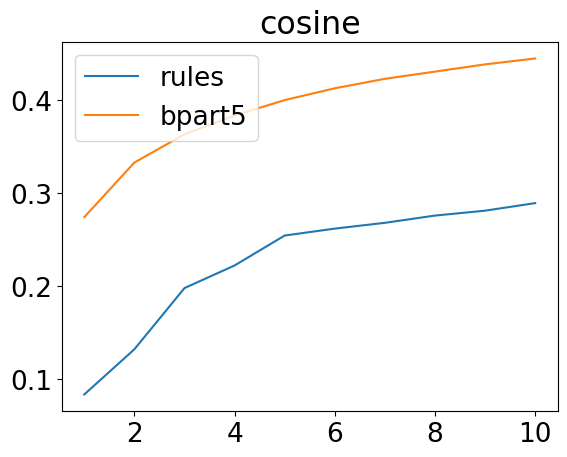

In [31]:
plot_metric("cosine", methods, subset_result)

# 3. New labels


In [32]:
def new_label_info(load=True):
    if load:
        with open("recommended_labels.json","r") as urlf:
            recommended_labels=json.load(urlf)
        with open("new_labels.json","r") as nlf:
            new_labels=json.load(nlf)
    else:
        recommended_labels = dict()
        new_labels = dict()
        labels_in_rep = list(labels_in_split["train"])
        for method in methods:
            recommended_labels_method = list()
            new_labels_method = list()
            for case in tqdm(rec_cases[method], desc="recommendation case for recommendation case"):
                for rec in case["recommendations_with_scores"]:
                    rec = rec[0]
                    recommended_labels_method.append(rec)
                    if rec not in labels_in_rep:
                        new_labels_method.append(rec)
            recommended_labels[method] = recommended_labels_method
            new_labels[method] = new_labels_method
        with open("recommended_labels.json","w") as urlf:
            json.dump(recommended_labels,urlf)
        with open("new_labels.json","w") as nlf:
            json.dump(new_labels,nlf)
    return recommended_labels,new_labels


In [33]:
recommended_labels,new_labels = new_label_info()

In [34]:
print("Number of made recommendations (10 * nr. rec cases):"+str(len(rec_cases["rules"])*10))
print("Number (percentage) of new labels recommended:")
for method in methods:
    nr = len(new_labels[method])
    print(method+ ": " + str(nr) + " (" + str(round(nr/(len(rec_cases["rules"]*10))*100,2)) + ")" )


Number of made recommendations (10 * nr. rec cases):361430
Number (percentage) of new labels recommended:
rules: 0 (0.0)
bpart5: 130832 (36.2)


In [35]:
print("Number of unique labels recommended: ")
for method in methods:
    nr = len(set(recommended_labels[method]))
    print(method+ ": " + str(nr))
print("Number (percentage) of unique new labels recommended: ")
for method in methods:
    nr = len(set(recommended_labels[method]))
    print(method+ ": " + str(len(set(new_labels[method]))) + " (" + str(round((len(set(new_labels[method]))/nr)*100,2))+")")


Number of unique labels recommended: 
rules: 16551
bpart5: 98857
Number (percentage) of unique new labels recommended: 
rules: 0 (0.0)
bpart5: 74689 (75.55)
